## Univariate Inequality Charts w/ matplotlib

In [1]:
#!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist import Subplot

def plot_univariate_inequality(
    xdata,
    inclusive=False,
    raycolor='blue',
    bgcolor='white',
    xlim=None,
    figsize=(5, 0.5),
    figure=None,
    title=None,
    **kwargs):
    """Plot a chart of a univariate inequality ray with matplotlib
    
    Args:
        xdata (list, tuple): endpoints of the ray: ``[start, ..., end]``
        
    Kwargs:
        inclusive (bool): if True, draw a filled circle; if False, draw a circle without fill
        raycolor (str): matplotlib color of the line and markers
        bgcolor (str): matplotlib color for the background and circle without fill
        xlim (None, True, or list/tuple): if True, calculate defaults for xmin and xmax of the x-axis
        figsize (tuple): matplotlib figsize
        figure (None or matplotlib.figure.Figure): Figure to add a plot to
        title (None or str): Title to add the the plot
        kwargs: all other kwargs will be passed to `plt.figure()`
        
    Returns:
        matplotlib.figure.Figure: inequality figure
    """

    _xdata = sorted(xdata)
    xstart = _xdata[0]
    xend = _xdata[-1]
    lefttoright = xstart <= xend
    lefttoright2 = xdata[0] <= xdata[-1]

    fig1 = figure or plt.figure(figsize=figsize, facecolor=bgcolor, **kwargs)
    ax1 = Subplot(fig1, 111)
    fig1.add_subplot(ax1)

    style = {}
    style['linewidth'] = 4
    style['linestyle'] = 'solid'
    style['color'] = raycolor
    style['marker'] = 'o'
    style['markersize'] = 12
    style['markevery'] = [0] if lefttoright else [-1]
    style['markerfacecolor'] = raycolor if inclusive else bgcolor 
    style['markeredgecolor'] = raycolor
    style['markeredgewidth'] = 4
    
    arrowstyle = {}
    arrowstyle['marker'] = '>' if lefttoright2 else '<'
    arrowstyle['markersize'] = 12
    arrowstyle['markerfacecolor'] = raycolor
    arrowstyle['markeredgecolor'] = raycolor
    arrowy = xdata[-1] if lefttoright else xdata[0]
    
    ax1.set(ylim=(-0.5, 1))
    
    if xlim is True:
        xlim = (float(xstart - 1), float(xend + 0.5))
    if xlim:
        ax1.set(xlim=xlim)

    ax1.axis["left"].set_visible(False)
    ax1.axis["right"].set_visible(False)
    ax1.axis["top"].set_visible(False)

    #ax1.axis["bottom"].set_axisline_style(axisline_style="->", size=2)
    ax1.plot(1, -0.5, ">k", transform=ax1.get_yaxis_transform(), clip_on=False)
    ax1.plot(0, -0.5, "<k", transform=ax1.get_yaxis_transform(), clip_on=False)
    
    _x = [xval for xval in xdata]
    _y = [0 for xval in xdata]
    plt.plot(_x, _y, **style)
    if title:
        ax1.set_title(title)
    plt.plot(arrowy, 0, **arrowstyle)
    return fig1

x = [-1, 3]
output = plot_univariate_inequality(x)

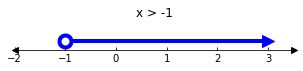

In [3]:
x = [-1, 3]
output = plot_univariate_inequality(x, xlim=True, title="x > -1")

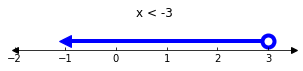

In [4]:
x = [3, -1]
output = plot_univariate_inequality(x, xlim=True, title="x < -3")

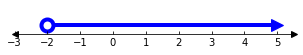

In [5]:
x = [-2, 5]
output = plot_univariate_inequality(x, xlim=True)

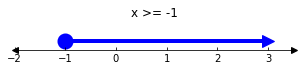

In [6]:
x = [-1, 3]
output = plot_univariate_inequality(x, inclusive=True, xlim=True, title="x >= -1")

## Sympy inequalities
- https://docs.sympy.org/latest/modules/core.html#greaterthan

In [7]:
#!pip install sympy

In [8]:
import sympy
from sympy import symbols, Eq, solve
x = symbols('x', real=True)
expr = sympy.solve(x >= -3)
expr

-3 <= x

In [9]:
display(expr)
display(sympy.latex(expr))
print('## pprint')
sympy.pprint(expr)
sympy.pprint(expr, use_unicode=True)
sympy.pprint(expr, use_unicode=False)
print('## str, repr')
display(str(expr))
display(repr(expr))

-3 <= x

'-3 \\leq x'

## pprint
-3 ≤ x
-3 ≤ x
-3 <= x
## str, repr


'-3 <= x'

'-3 <= x'

In [10]:
display((expr.lhs, expr.rhs))  # left-hand side, # right-hand side
display((expr.lts, expr.gts))  # less-than side, # greater-than side
# Sympy rewrites inequalities so that the left-hand side is the less-than-side:
assert expr.lhs == expr.lts
assert expr.rhs == expr.gts

(-3, x)

(-3, x)

In [11]:
expr = sympy.solve(x <= 10)
expr2 = sympy.LessThan(x, 10)
expr3 = (x <= 10)
expr4 = (10 >= x)
display(expr, expr2, expr3, expr4)
assert expr == expr2 == expr3 == expr4
# Sympy rewrites inequalities so that the left-hand side is the less-than-side:
assert (expr.lhs, expr.rhs) == (expr.lts, expr.gts)
assert (expr4.lhs, expr4.rhs) == (expr4.lts, expr4.gts)
display((expr2.lts, expr2.gts))
display((expr3.lts, expr3.gts))
display((expr4.lts, expr4.gts))

x <= 10

x <= 10

x <= 10

x <= 10

(x, 10)

(x, 10)

(x, 10)

In [12]:
expr.rel_op

'<='

In [13]:
REL_OP_MAP = {
    '<=': dict(offset=-1, inclusive=True),
    '<': dict(offset=-1, inclusive=False),
    '>=': dict(offset=1, inclusive=True),
    '>': dict(offset=1, inclusive=False),
}

def get_points_from_ineq_expr(expr, offsetmultiplier=5):
    xstart = expr.gts if expr.rel_op in {'<=', '<'} else expr.lts
    kwargs = REL_OP_MAP.get(expr.rel_op).copy()
    xend = xstart + (kwargs.pop('offset') * offsetmultiplier)
    x = [xstart, xend]
    return x, kwargs

x = symbols('x', real=True)

xdata, kwargs = get_points_from_ineq_expr(x <= 3)
assert xdata == [3, -2]
assert kwargs == dict(inclusive=True)

xdata, kwargs = get_points_from_ineq_expr(x <= 5)
assert xdata == [5, 0]
assert kwargs == dict(inclusive=True)

xdata, kwargs = get_points_from_ineq_expr(x > 4)
assert xdata == [4, 9]
assert kwargs == dict(inclusive=False)

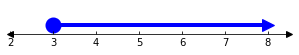

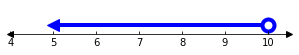

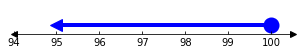

In [14]:
def plot_ineq_expr(expr, **kwargs):
    xdata, kwargs = get_points_from_ineq_expr(expr)
    kwargs.setdefault('xlim', True)
    return plot_univariate_inequality(xdata, **kwargs)

x = symbols('x', real=True)
output = plot_ineq_expr(x >= 3)
output = plot_ineq_expr(10 > x)
output = plot_ineq_expr(100 >= x)